<a href="https://colab.research.google.com/github/nazalnihad/image_processing/blob/main/noise_and_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

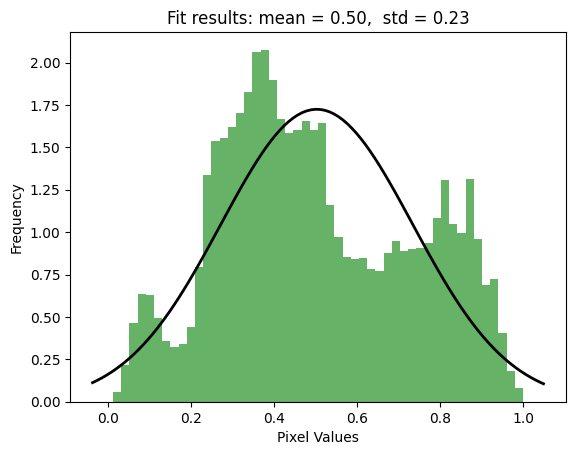

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import ndimage
import cv2

image = plt.imread('/content/lena.png')

# Flatten the image to a 1D array
flat_image = image.flatten()

# Estimate the mean and standard deviation of the pixel values
mean, std_dev = norm.fit(flat_image)

# histogram of the pixel values
plt.hist(flat_image, bins=50, density=True, alpha=0.6, color='g')

# Gaussian distribution based on the estimated mean and standard deviation
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)


plt.title("Fit results: mean = %.2f,  std = %.2f" % (mean, std_dev))
plt.xlabel('Pixel Values')
plt.ylabel('Frequency')

plt.show()


In [76]:
noise = np.random.normal(0.1, 0.3, flat_image.shape)
noise = noise.reshape(image.shape)
noisy_image = image + noise
noisy = np.clip(noisy_image, 0, 1)


plt.imsave('noisy_image.png', noisy, cmap='gray')

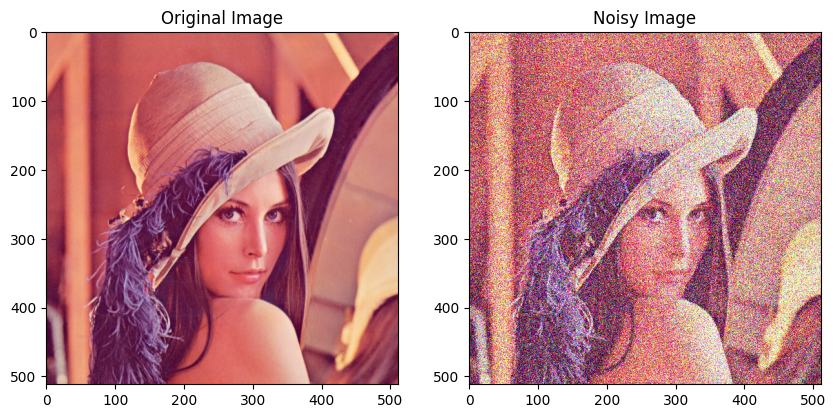

In [77]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.show()

In [78]:
def calculate_psnr(original, noisy):
    mse = np.mean((original - noisy) ** 2)
    max_pixel = np.max(original)
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

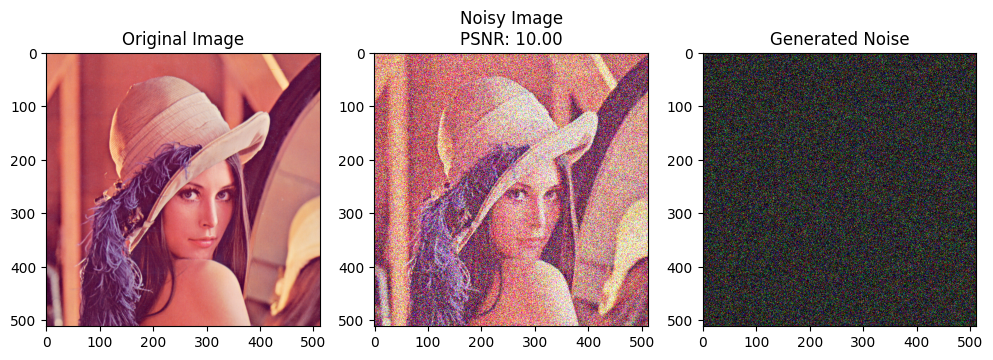


PSNR : 10.00


In [79]:
psnr_value = calculate_psnr(image, noisy_image)
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f'Noisy Image\nPSNR: {psnr_value:.2f}')

plt.subplot(1, 3, 3)
plt.imshow(noise, cmap='gray')
plt.title('Generated Noise')

plt.show()

print(f"\nPSNR : {psnr_value:.2f}")

In [58]:
def create_mask(dimension):
  filter = np.ones((dimension, dimension))

    # Calculate the reciprocal of the total number of elements in the filter
  reciprocal_factor = 1 / (dimension * dimension)

    # Multiply the filter by the reciprocal factor
  filter *= reciprocal_factor

  return filter

In [12]:
def gaussianFilter():
  return (1/16)*np.array([[1,2,1],[2,4,2],[1,2,1]])

In [13]:
gaussianFilter()

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

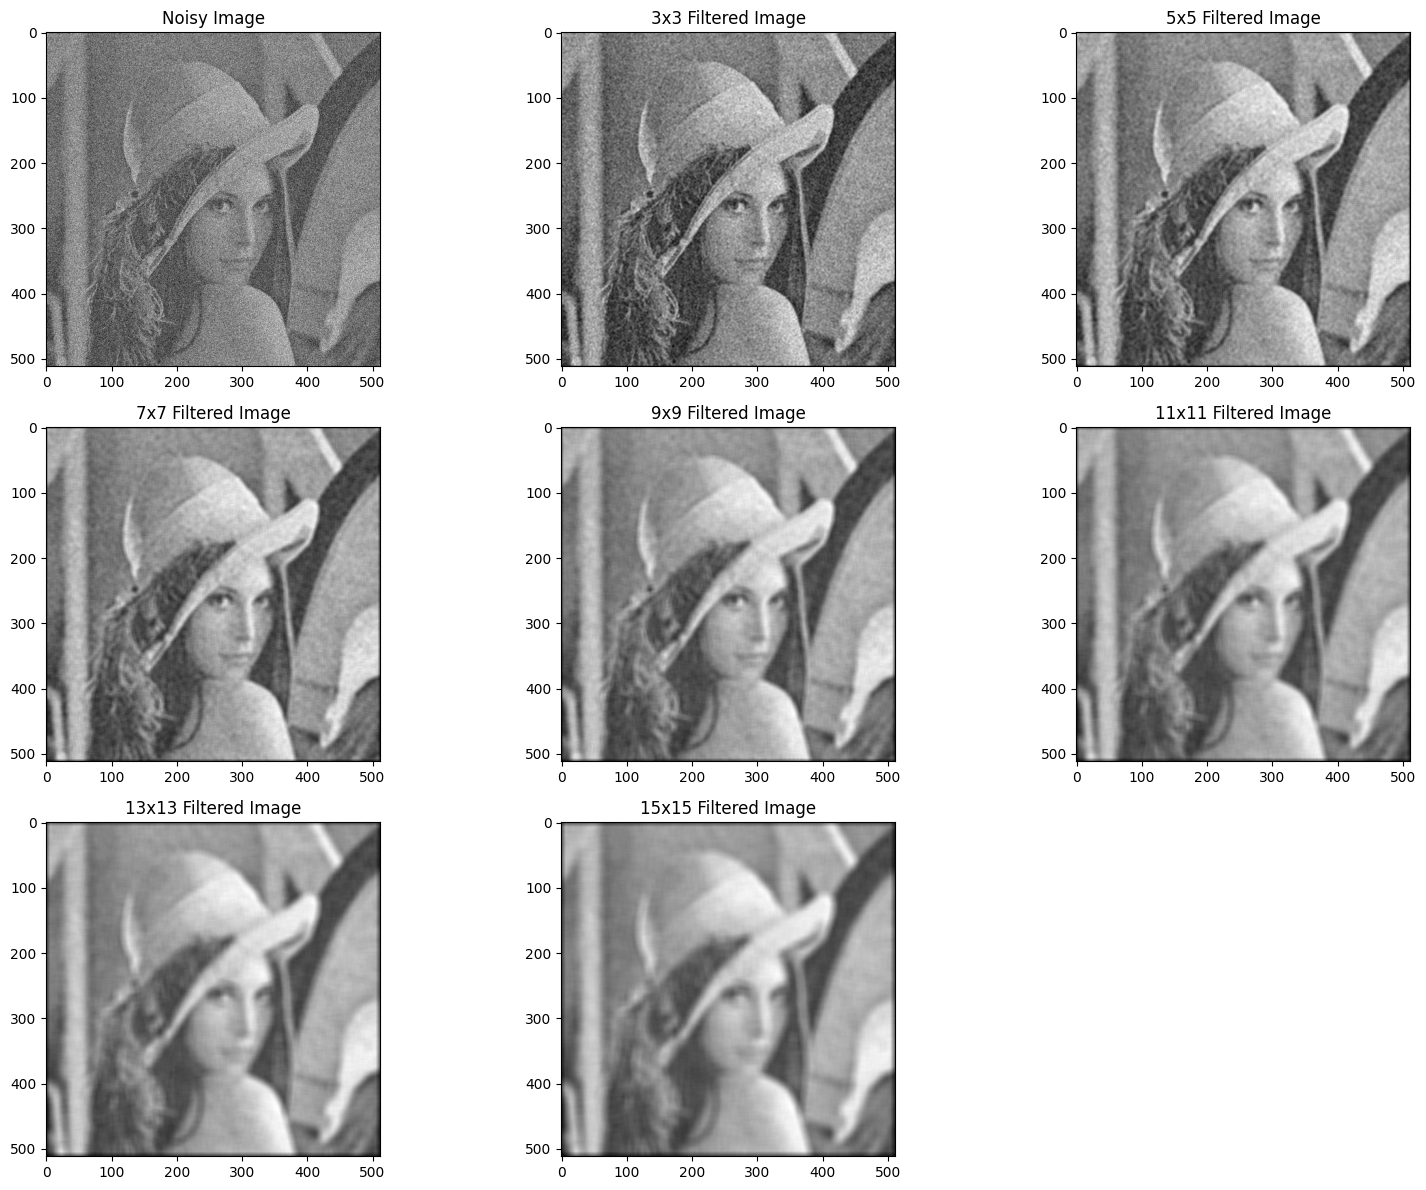

In [80]:

noisy_image_gray = plt.imread('/content/noisy_image.png')

# Convert the color image to grayscale
noisy_image_gray = np.mean(noisy_image, axis=-1)

filter_3 = create_mask(3)
filter_5 = create_mask(5)
filter_7 = create_mask(7)
filter_9 = create_mask(9)
filter_11 = create_mask(11)
filter_13 = create_mask(13)
filter_15 = create_mask(15)

# convolution with padding
def apply_convolution(image, filter):
    height, width = image.shape
    f_height, f_width = filter.shape

    #  padding size
    pad_height = f_height // 2
    pad_width = f_width // 2

    # Pad the image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    result = np.zeros_like(image)

    for i in range(pad_height, height + pad_height):
        for j in range(pad_width, width + pad_width):
            region = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            result[i - pad_height, j - pad_width] = np.sum(region * filter)

    return result

filtered_image_3 = apply_convolution(noisy_image_gray, filter_3)
filtered_image_5 = apply_convolution(noisy_image_gray, filter_5)
filtered_image_7 = apply_convolution(noisy_image_gray, filter_7)
filtered_image_9 = apply_convolution(noisy_image_gray, filter_9)
filtered_image_11 = apply_convolution(noisy_image_gray, filter_11)
filtered_image_13 = apply_convolution(noisy_image_gray, filter_13)
filtered_image_15 = apply_convolution(noisy_image_gray, filter_15)

plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
plt.imshow(noisy_image_gray, cmap='gray')
plt.title('Noisy Image')

plt.subplot(3, 3, 2)
plt.imshow(filtered_image_3, cmap='gray')
plt.title('3x3 Filtered Image')

plt.subplot(3, 3, 3)
plt.imshow(filtered_image_5, cmap='gray')
plt.title('5x5 Filtered Image')

plt.subplot(3, 3, 4)
plt.imshow(filtered_image_7, cmap='gray')
plt.title('7x7 Filtered Image')

plt.subplot(3, 3, 5)
plt.imshow(filtered_image_9, cmap='gray')
plt.title('9x9 Filtered Image')

plt.subplot(3, 3, 6)
plt.imshow(filtered_image_11, cmap='gray')
plt.title('11x11 Filtered Image')

plt.subplot(3, 3, 7)
plt.imshow(filtered_image_13, cmap='gray')
plt.title('13x13 Filtered Image')

plt.subplot(3, 3, 8)
plt.imshow(filtered_image_15, cmap='gray')
plt.title('15x15 Filtered Image')

plt.tight_layout()
plt.show()

In [81]:
import pandas as pd

x3_filter = calculate_psnr(noisy_image_gray, filtered_image_3)
x5_filter = calculate_psnr(noisy_image_gray, filtered_image_5)
x7_filter = calculate_psnr(noisy_image_gray, filtered_image_7)
x9_filter = calculate_psnr(noisy_image_gray, filtered_image_9)
x11_filter = calculate_psnr(noisy_image_gray, filtered_image_11)
x13_filter = calculate_psnr(noisy_image_gray, filtered_image_13)
x15_filter = calculate_psnr(noisy_image_gray, filtered_image_15)

data = {'Filter Size': [3, 5, 7, 9, 11, 13, 15],
        'PSNR': [x3_filter, x5_filter, x7_filter, x9_filter, x11_filter, x13_filter, x15_filter]}
psnr_df = pd.DataFrame(data)


print(psnr_df)

   Filter Size       PSNR
0            3  19.634771
1            5  19.183967
2            7  18.987361
3            9  18.850036
4           11  18.732818
5           13  18.630096
6           15  18.531561


In [63]:

def gaussian_filter(image, kernel_size):
    kernel_size = (kernel_size, kernel_size)

    # Create a Gaussian kernel
    kernel = cv2.getGaussianKernel(kernel_size[0], 0) * cv2.getGaussianKernel(kernel_size[1], 0).T

    kernel /= np.sum(kernel)

    # Apply the Gaussian filter to the input image
    filtered_image = cv2.filter2D(image, -1, kernel)

    return filtered_image

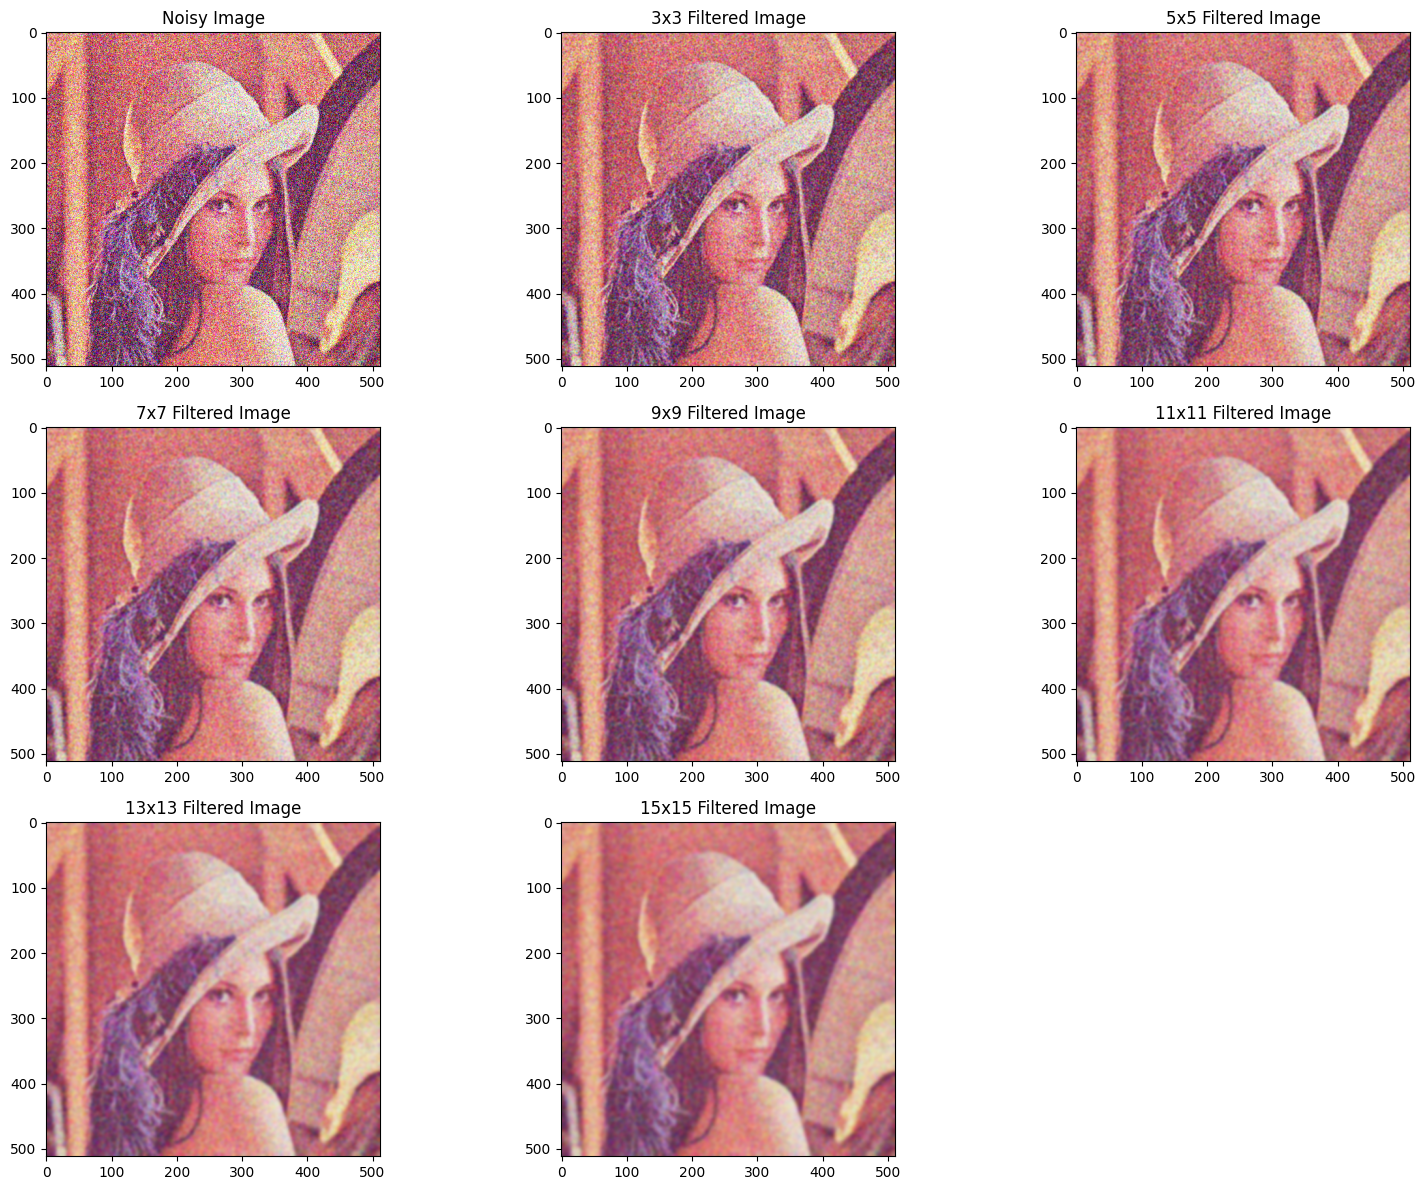

In [85]:

image = cv2.imread('/content/noisy_image.png')

# Convert the image to RGB format
gauss_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gaussian_filter_3 = gaussian_filter(gauss_image, 3)
gaussian_filter_5 = gaussian_filter(gauss_image, 5)
gaussian_filter_7 = gaussian_filter(gauss_image, 7)
gaussian_filter_9 = gaussian_filter(gauss_image, 9)
gaussian_filter_11 = gaussian_filter(gauss_image, 11)
gaussian_filter_13 = gaussian_filter(gauss_image, 13)
gaussian_filter_15 = gaussian_filter(gauss_image, 15)


plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
plt.imshow(gauss_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(3, 3, 2)
plt.imshow(gaussian_filter_3, cmap='gray')
plt.title('3x3 Filtered Image')

plt.subplot(3, 3, 3)
plt.imshow(gaussian_filter_5, cmap='gray')
plt.title('5x5 Filtered Image')

plt.subplot(3, 3, 4)
plt.imshow(gaussian_filter_7, cmap='gray')
plt.title('7x7 Filtered Image')

plt.subplot(3, 3, 5)
plt.imshow(gaussian_filter_9, cmap='gray')
plt.title('9x9 Filtered Image')

plt.subplot(3, 3, 6)
plt.imshow(gaussian_filter_11, cmap='gray')
plt.title('11x11 Filtered Image')

plt.subplot(3, 3, 7)
plt.imshow(gaussian_filter_13, cmap='gray')
plt.title('13x13 Filtered Image')

plt.subplot(3, 3, 8)
plt.imshow(gaussian_filter_15, cmap='gray')
plt.title('15x15 Filtered Image')

plt.tight_layout()
plt.show()

In [88]:
import pandas as pd

x3_filter_gaussian = calculate_psnr(gauss_image, gaussian_filter_3)
x5_filter_gaussian = calculate_psnr(gauss_image, gaussian_filter_5)
x7_filter_gaussian = calculate_psnr(gauss_image, gaussian_filter_7)
x9_filter_gaussian = calculate_psnr(gauss_image, gaussian_filter_9)
x11_filter_gaussian = calculate_psnr(gauss_image, gaussian_filter_11)
x13_filter_gaussian = calculate_psnr(gauss_image, gaussian_filter_13)
x15_filter_gaussian = calculate_psnr(gauss_image, gaussian_filter_15)

data = {'Filter Size': [3, 5, 7, 9, 11, 13, 15],
        'PSNR': [x3_filter_gaussian, x5_filter_gaussian, x7_filter_gaussian, x9_filter_gaussian, x11_filter_gaussian, x13_filter_gaussian, x15_filter_gaussian]}
psnr_df = pd.DataFrame(data)


print(psnr_df)

   Filter Size       PSNR
0            3  27.862942
1            5  27.840139
2            7  27.838228
3            9  27.845219
4           11  27.843616
5           13  27.848713
6           15  27.847326
